# Power Transformation
If any algorithm that works well on normal distribution but you dont have normal distribution data, then can conver to the normal distribution by two power transformation methods.

- Box-Cox
- Yeo-Johnson

## Box-Cox

![Box-Cox Formula](./images/image-3.png)

The exponent here is a variable called lambda ($\lambda$) that varies over the range of -5 to 5, and in the process of searching, we examine all values of $\lambda$. Finally, we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.

**This transformation is only available only those numbers which are greater than zero (0). $X_i > 0$**

## Yeo-Johnson

![Yeo Johnson Formula](./images/image-4.png)

**There is a limitation for Box-Cox transformation is $X_i > 0$. Yeo-Johnson solves this problem. This transformation is somewhat of an adjustment to the Box-Cox transformation, by which we can apply it to negative numbers.**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../Datasets/Concrete/concrete_data.csv")
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
807,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,28,37.42
580,290.2,193.5,0.0,185.7,0.0,998.2,704.3,7,21.86
636,300.0,0.0,0.0,184.0,0.0,1075.0,795.0,28,26.85
521,284.0,15.0,141.0,179.0,5.5,842.0,801.0,7,24.13
252,250.0,0.0,95.7,187.4,5.5,956.9,861.2,56,38.33


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
X = df.drop(columns = ["Strength"], axis = 1)
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# applying regression without any transformation
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314851

In [9]:
# cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring = "r2"))

0.4609940491662866

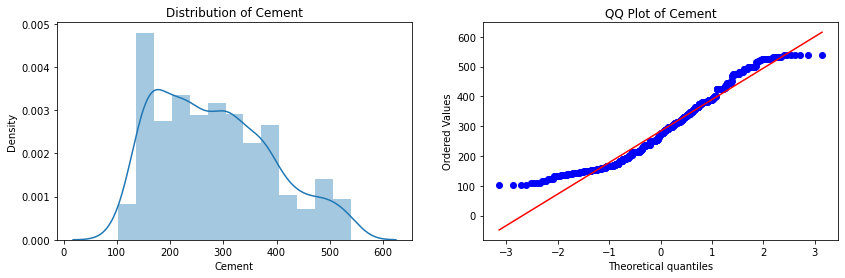

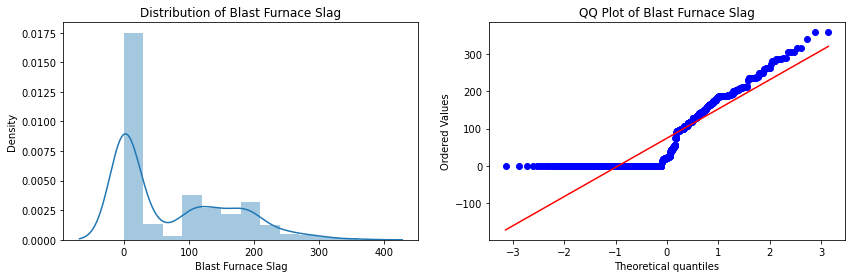

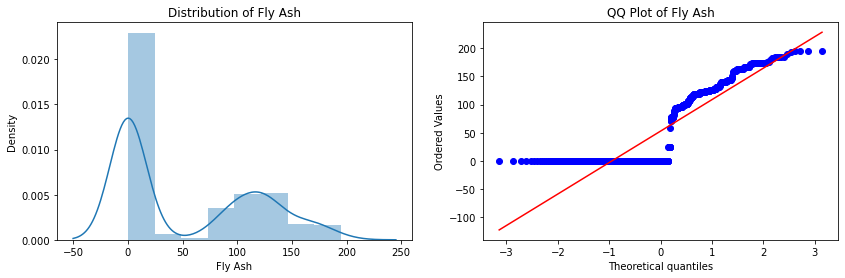

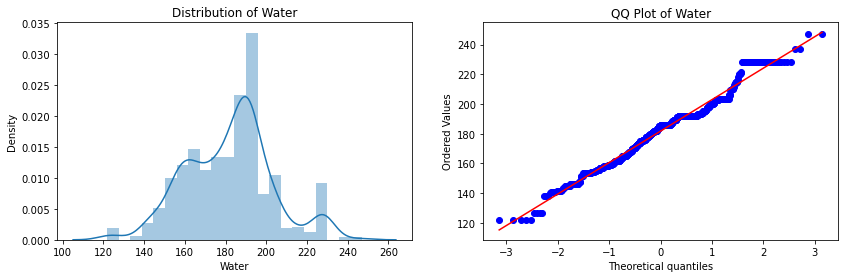

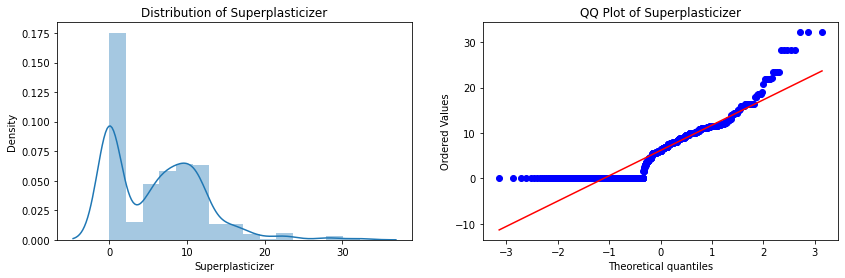

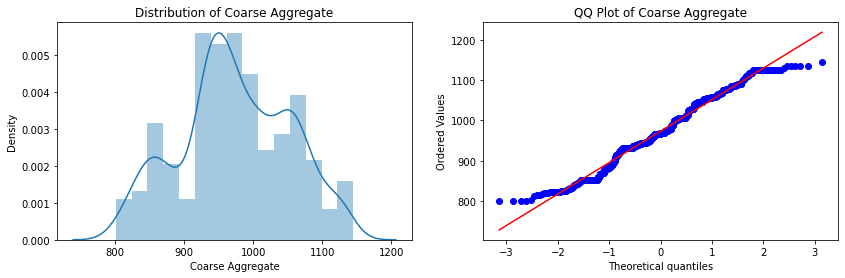

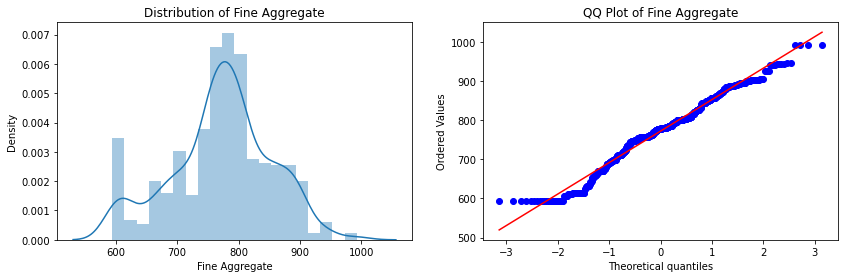

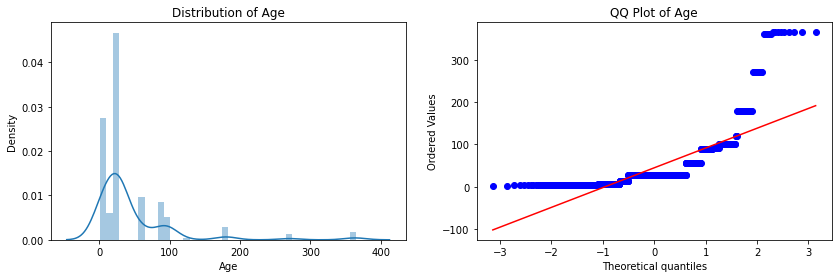

In [11]:
# plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Distribution of {col}")
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist = "norm", plot = plt)
    plt.title(f"QQ Plot of {col}")
    
    plt.show()

In [17]:
# applying Box-Cox transformation

pt = PowerTransformer(method = "box-cox")

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed  = pt.transform(X_test + 0.000001)

pd.DataFrame({"cols": X_train.columns, "box_cox_lambdas": pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [19]:
# applying linear regression on transformed data
lr      = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test, y_pred2)

0.8047825006181188

In [20]:
# using cross val score
pt            = PowerTransformer(method = "box-cox")
X_transformed = pt.fit_transform(X + 0.0000001)

lr            = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, y, scoring = "r2"))

0.6658537942219864

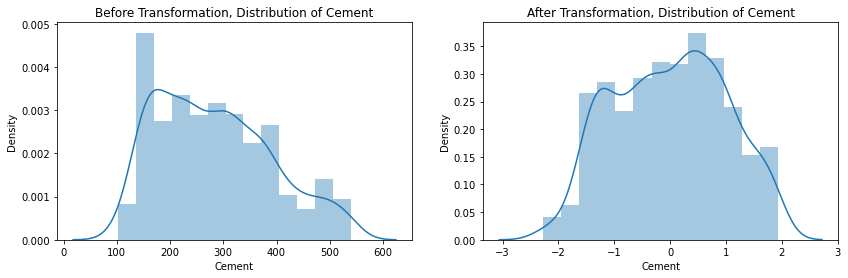

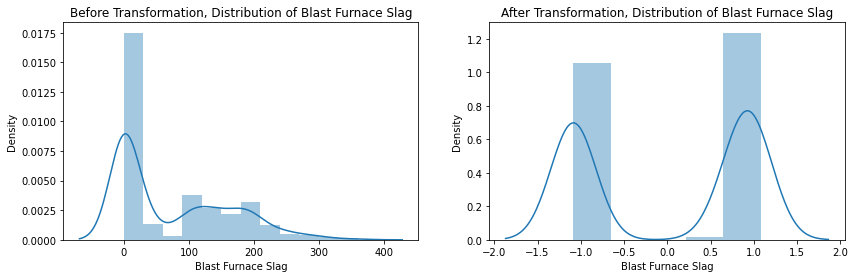

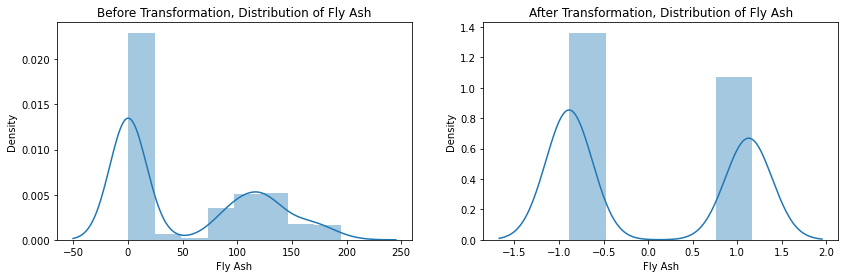

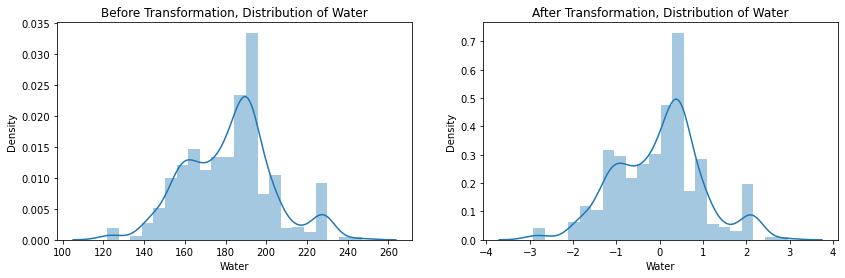

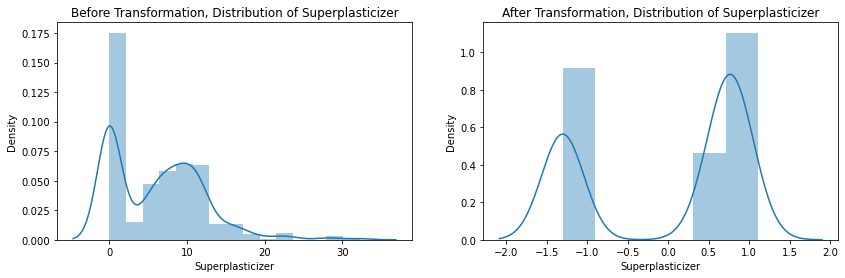

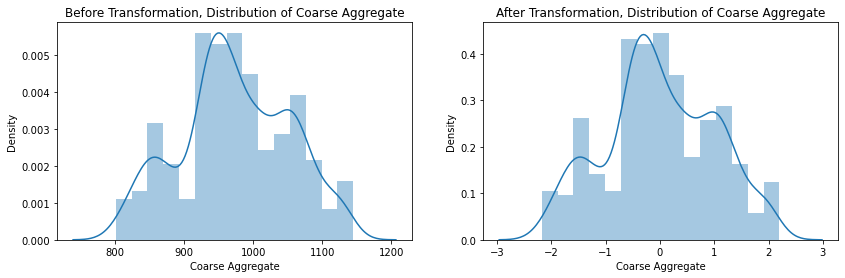

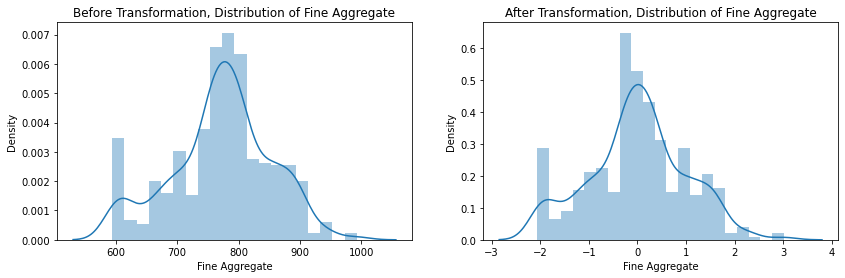

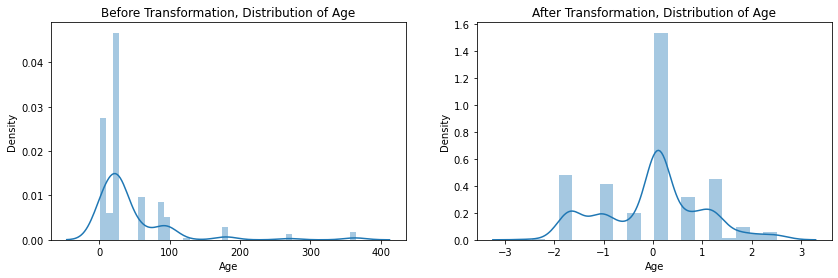

In [22]:
# before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Before Transformation, Distribution of {col}")
    
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(f"After Transformation, Distribution of {col}")
    
    plt.show()

In [23]:
# apply Yeo-Johnson transform

pt2                  = PowerTransformer(method = "yeo-johnson")

X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2  = pt2.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3              = lr.predict(X_test_transformed2)

print(r2_score(y_test, y_pred3))

pd.DataFrame({"cols": X_train.columns, "Yeo_Johnson_lambdas": pt2.lambdas_})

0.8161906513339305


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [24]:
# applying cross val score
pt             = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr             = LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, y, scoring = "r2"))

0.6834625134285746

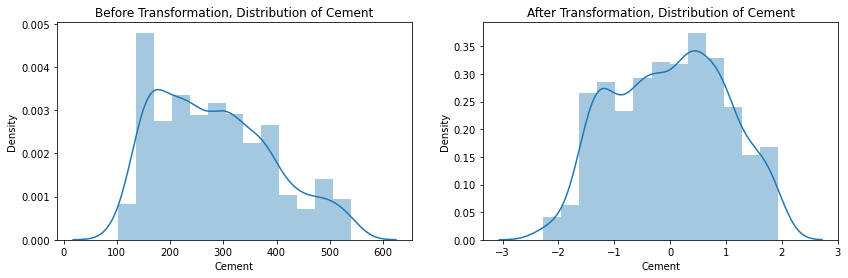

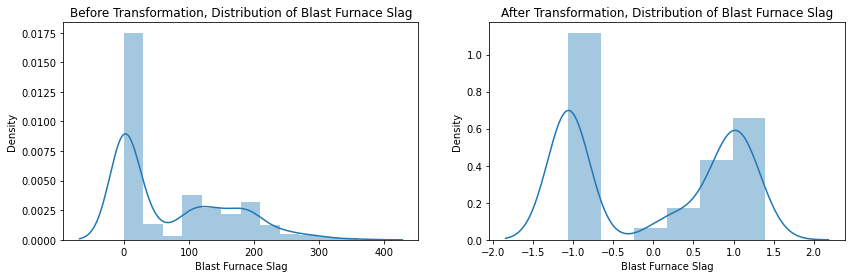

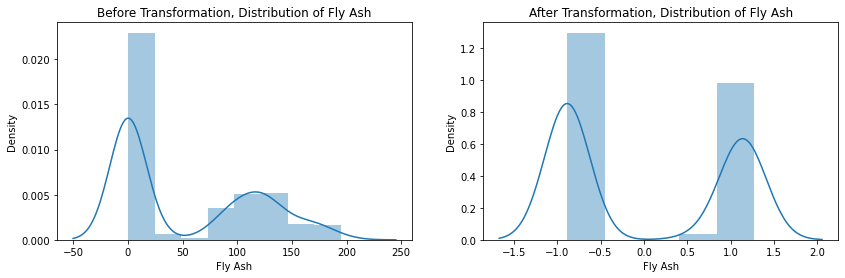

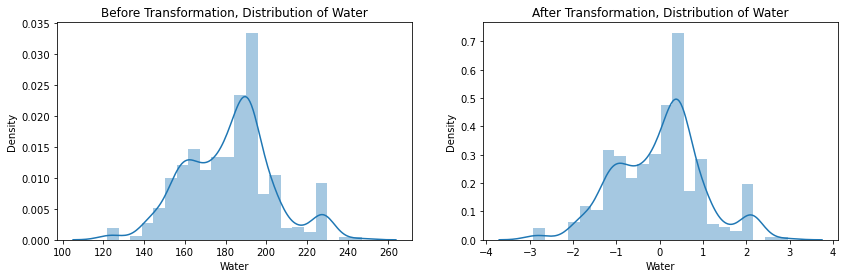

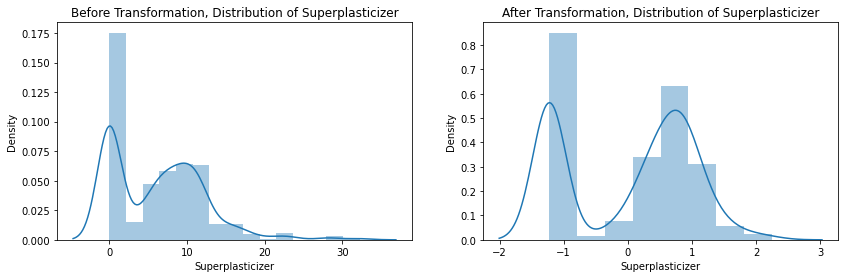

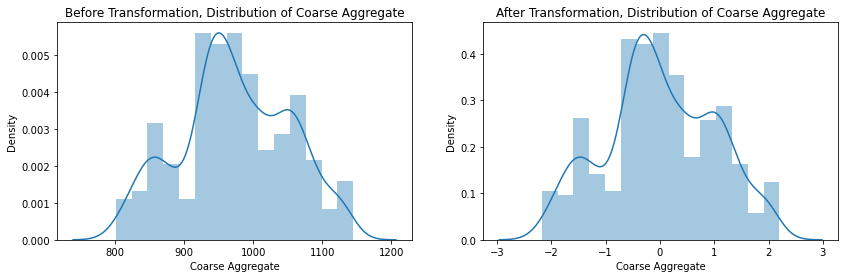

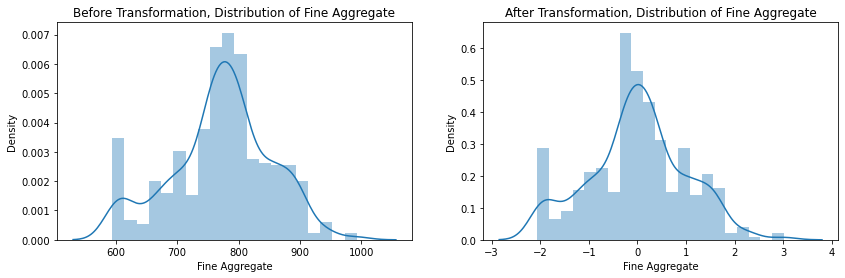

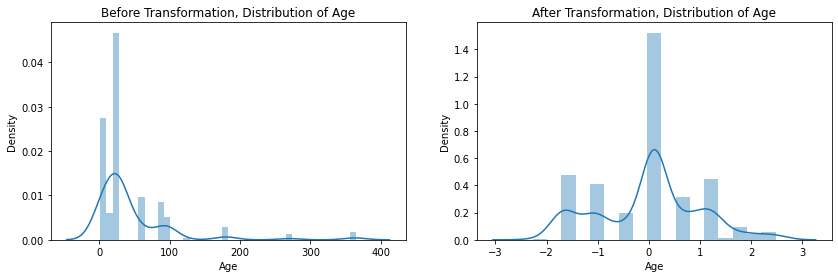

In [25]:
# before and after comparision for Yeo-Johson
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns = X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Before Transformation, Distribution of {col}")
    
    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(f"After Transformation, Distribution of {col}")
    
    plt.show()

In [26]:
# side by side lambads
pd.DataFrame({"cols": X_train.columns, "box_cox_lambdas": pt.lambdas_, "yeo_johnson_lambdas": pt2.lambdas_})

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
